In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")


In [26]:
df = pd.read_csv('D:\\data mining project\\globalterrorismdb_0718dist.csv', encoding='latin1')
df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970000e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970000e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970000e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2.020000e+11,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,2.020000e+11,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,2.020000e+11,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,2.020000e+11,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [27]:
df.rename(columns={'iyear':'Year','imonth':'Month','city':'City','iday':'Day','country_txt':'Country','region_txt':'Region',
                   'attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded',
                   'summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type',
                   'motive':'Motive'},inplace=True)
df['Casualities'] = df.Killed + df.Wounded
df=df[['Year','Month','Day','Country','Region','City','latitude','longitude','AttackType','Killed','Wounded','Casualities',
       'Target','Group','Target_type','Weapon_type']]
df

,Year,Month,Day,Country,Region,City,latitude,longitude,AttackType,Killed,Wounded,Casualities,Target,Group,Target_type,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,1.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,1.0,Employee,Unknown,Journalists & Media,Unknown
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,NaN,U.S. Embassy,Unknown,Government (Diplomatic),Explosives
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,NaN,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Sub-Saharan Africa,Ceelka Geelow,2.359673,45.385034,Armed Assault,1.0,2.0,3.0,Checkpoint,Al-Shabaab,Military,Firearms
181687,2017,12,31,Syria,Middle East & North Africa,Jableh,35.407278,35.942679,Bombing/Explosion,2.0,7.0,9.0,Hmeymim Air Base,Muslim extremists,Military,Explosives
181688,2017,12,31,Philippines,Southeast Asia,Kubentog,6.900742,124.437908,Facility/Infrastructure Attack,0.0,0.0,0.0,Houses,Bangsamoro Islamic Freedom Movement (BIFM),Private Citizens & Property,Incendiary
181689,2017,12,31,India,South Asia,Imphal,24.798346,93.940430,Bombing/Explosion,0.0,0.0,0.0,Office,Unknown,Government (General),Explosives


In [28]:
# Remove all duplicate rows 
df = df.drop_duplicates(keep=False)
len(df)

167056

In [29]:
# Drop rows with missing latitude or longitude
df = df.dropna(subset=['longitude', 'latitude'])

In [30]:
# df.fillna(0,inplace=True)
# len(df)

In [31]:
# Check for missing values
print(df.isnull().sum())

Year               0
Month              0
Day                0
Country            0
Region             0
City             422
latitude           0
longitude          0
AttackType         0
Killed          8562
Wounded        14160
Casualities    14674
Target           494
Group              0
Target_type        0
Weapon_type        0
dtype: int64


In [32]:
# Replace NaN values with 0
df.fillna(0, inplace=True)
df

,Year,Month,Day,Country,Region,City,latitude,longitude,AttackType,Killed,Wounded,Casualities,Target,Group,Target_type,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,1.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,1.0,Employee,Unknown,Journalists & Media,Unknown
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,0.0,0.0,0.0,U.S. Embassy,Unknown,Government (Diplomatic),Explosives
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,0.0,0.0,0.0,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Sub-Saharan Africa,Ceelka Geelow,2.359673,45.385034,Armed Assault,1.0,2.0,3.0,Checkpoint,Al-Shabaab,Military,Firearms
181687,2017,12,31,Syria,Middle East & North Africa,Jableh,35.407278,35.942679,Bombing/Explosion,2.0,7.0,9.0,Hmeymim Air Base,Muslim extremists,Military,Explosives
181688,2017,12,31,Philippines,Southeast Asia,Kubentog,6.900742,124.437908,Facility/Infrastructure Attack,0.0,0.0,0.0,Houses,Bangsamoro Islamic Freedom Movement (BIFM),Private Citizens & Property,Incendiary
181689,2017,12,31,India,South Asia,Imphal,24.798346,93.940430,Bombing/Explosion,0.0,0.0,0.0,Office,Unknown,Government (General),Explosives


In [33]:
# Check for missing values
print(df.isnull().sum())

Year           0
Month          0
Day            0
Country        0
Region         0
City           0
latitude       0
longitude      0
AttackType     0
Killed         0
Wounded        0
Casualities    0
Target         0
Group          0
Target_type    0
Weapon_type    0
dtype: int64


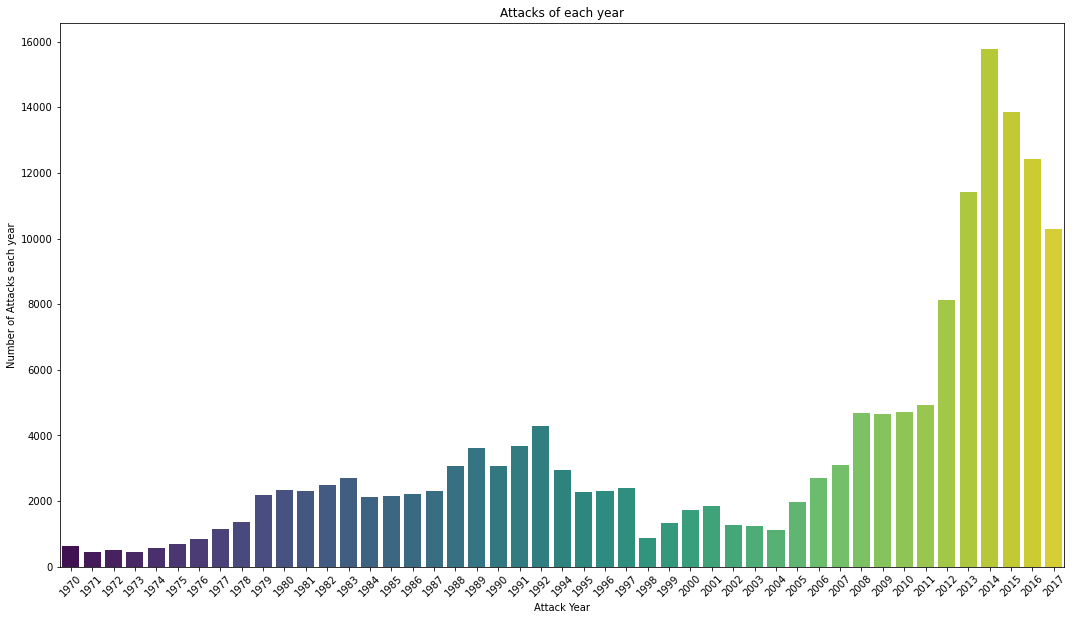

In [34]:
year_on_x_axis = df['Year'].unique()
no_of_attacks_y_axis = df['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = year_on_x_axis,
           y = no_of_attacks_y_axis,
           palette = 'viridis')
plt.xticks(rotation = 45)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks each year')
plt.title('Attacks of each year')
plt.show()

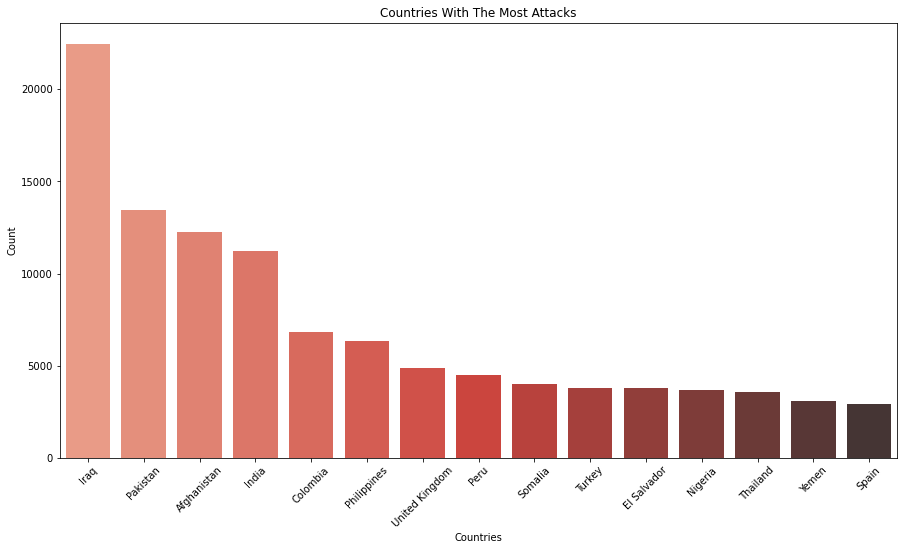

In [35]:
plt.subplots(figsize=(15,8))
sns.barplot(df['Country'].value_counts()[:15].index,df['Country'].value_counts()[:15].values,palette='Reds_d')
plt.title('Countries With The Most Attacks')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 45)
plt.show()

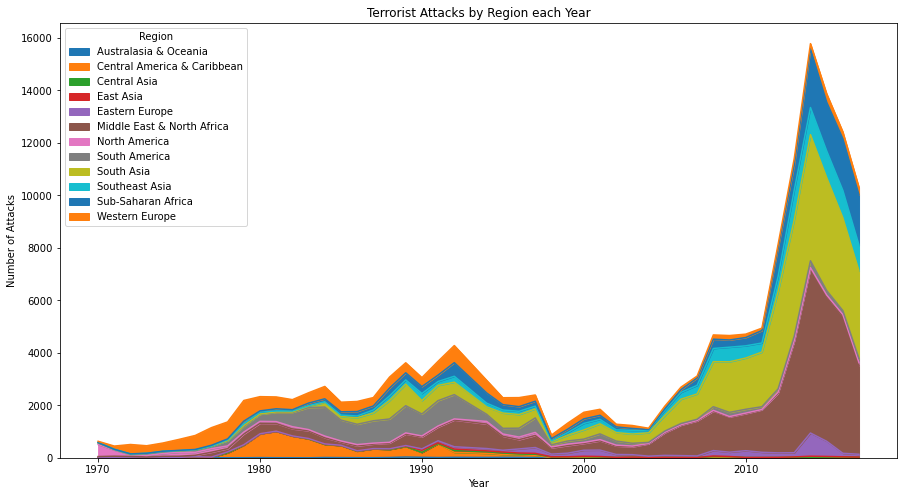

In [36]:
pd.crosstab(df.Year, df.Region).plot(kind='area',figsize=(15,8))
plt.title('Terrorist Attacks by Region each Year')
plt.ylabel('Number of Attacks')
plt.show()

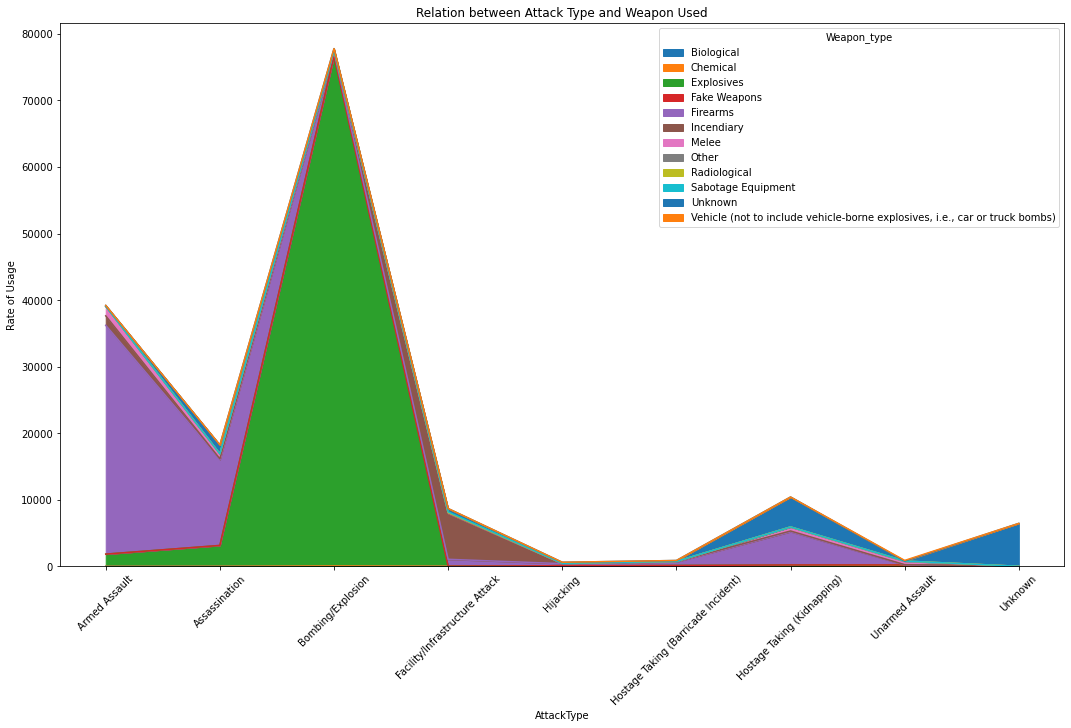

In [37]:
pd.crosstab(df['AttackType'], df['Weapon_type']).plot(kind='area',figsize=(18,10))
plt.title('Relation between Attack Type and Weapon Used')
plt.ylabel('Rate of Usage')
plt.xticks(rotation= 45)
plt.show()

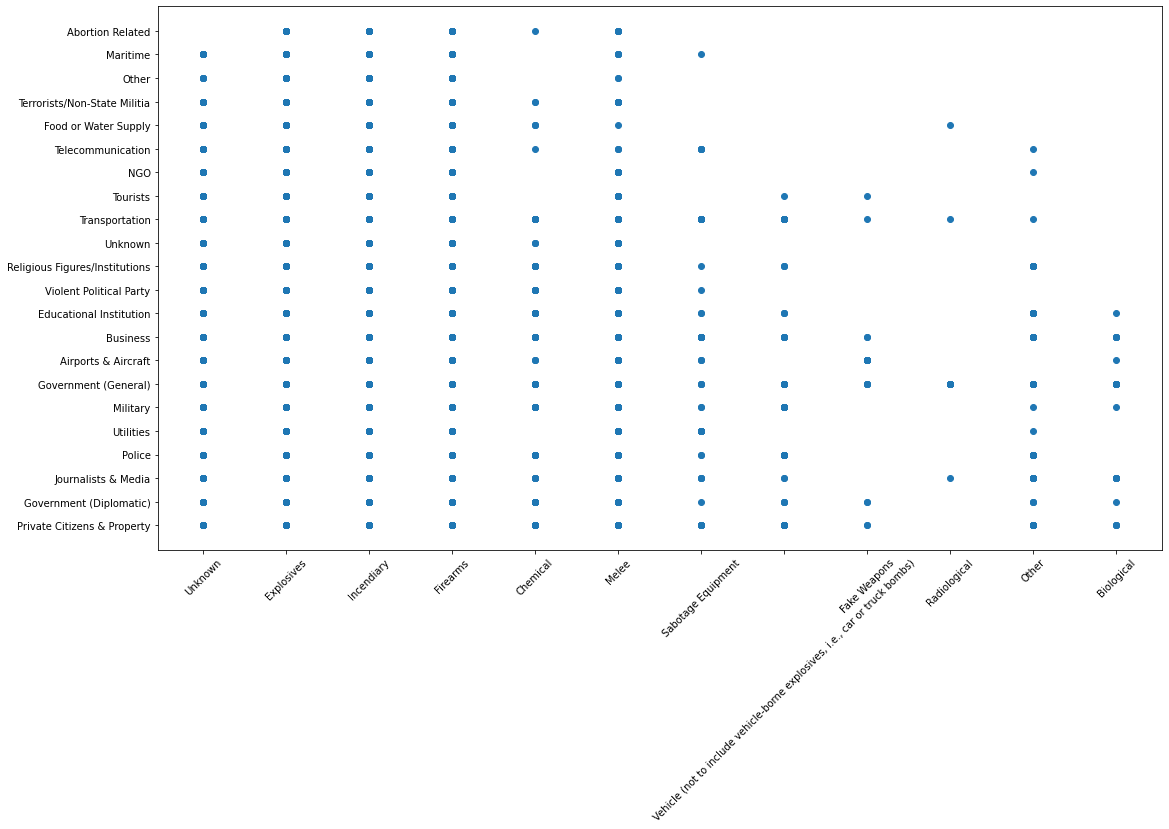

In [38]:
x = df['Weapon_type']
y = df['Target_type']
plt.figure(figsize = (18,10))
plt.scatter(x, y)
plt.xticks(rotation = 45)
plt.show()

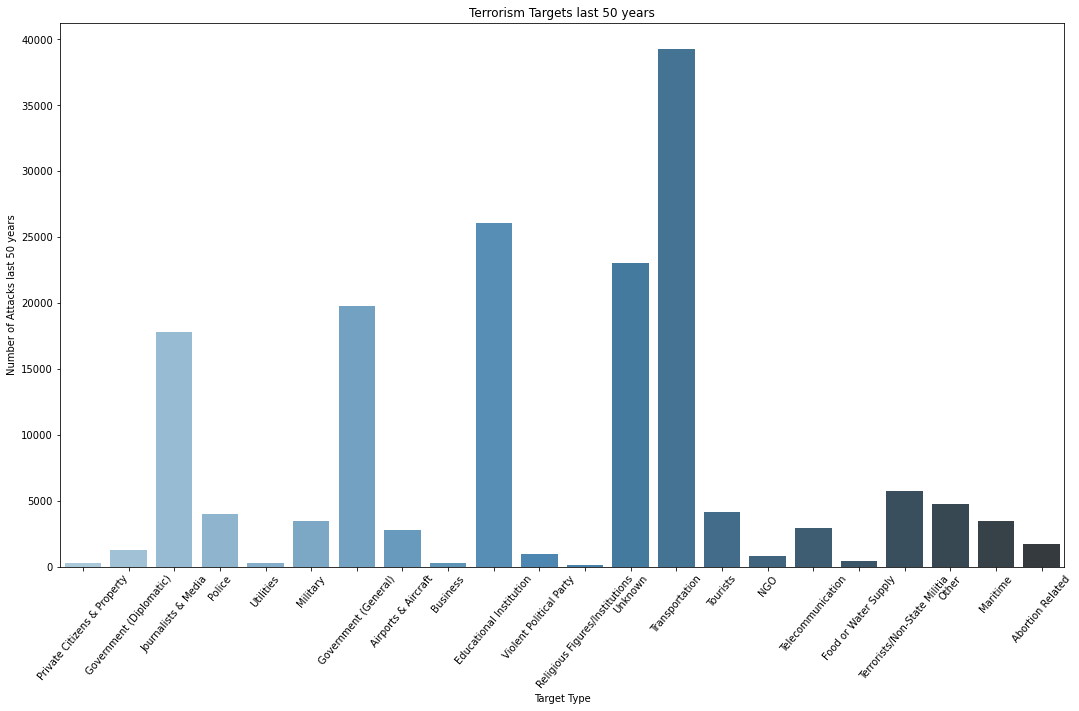

In [39]:
Target_Type_on_x_axis = df['Target_type'].unique()
no_of_attacks_y_axis = df['Target_type'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = Target_Type_on_x_axis,
           y = no_of_attacks_y_axis,
           palette = 'Blues_d')
plt.xticks(rotation = 50)
plt.xlabel('Target Type')
plt.ylabel('Number of Attacks last 50 years')
plt.title('Terrorism Targets last 50 years')
plt.show()

In [40]:
from sklearn.model_selection import train_test_split

X = df.drop("Casualities", axis=1)
y = df["Casualities"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [42]:
cat_cols = ["Country", "Region", "City", "Target_type", "Weapon_type"]
num_cols = ["Year", "Month", "Day", "latitude", "longitude", "Killed", "Wounded"]

preprocessor = ColumnTransformer([
    ("onehot", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ("scale", StandardScaler(), num_cols)
])

# Cast categorical variables to strings before preprocessing
X_train[cat_cols] = X_train[cat_cols].astype(str)
X_test[cat_cols] = X_test[cat_cols].astype(str)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)
df

,Year,Month,Day,Country,Region,City,latitude,longitude,AttackType,Killed,Wounded,Casualities,Target,Group,Target_type,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,1.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,1.0,Employee,Unknown,Journalists & Media,Unknown
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,0.0,0.0,0.0,U.S. Embassy,Unknown,Government (Diplomatic),Explosives
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,0.0,0.0,0.0,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Sub-Saharan Africa,Ceelka Geelow,2.359673,45.385034,Armed Assault,1.0,2.0,3.0,Checkpoint,Al-Shabaab,Military,Firearms
181687,2017,12,31,Syria,Middle East & North Africa,Jableh,35.407278,35.942679,Bombing/Explosion,2.0,7.0,9.0,Hmeymim Air Base,Muslim extremists,Military,Explosives
181688,2017,12,31,Philippines,Southeast Asia,Kubentog,6.900742,124.437908,Facility/Infrastructure Attack,0.0,0.0,0.0,Houses,Bangsamoro Islamic Freedom Movement (BIFM),Private Citizens & Property,Incendiary
181689,2017,12,31,India,South Asia,Imphal,24.798346,93.940430,Bombing/Explosion,0.0,0.0,0.0,Office,Unknown,Government (General),Explosives


In [43]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy_lr=lr.score(X_test, y_test)
print("Linear Regression Accuracy:",accuracy_lr )  

Linear Regression Accuracy: 0.9279537398168639


In [44]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy_dt=accuracy_score(y_test,y_pred)
print('Decision Tree Accuracy : ',accuracy_dt)

Decision Tree Accuracy :  0.9562446378232626


In [45]:
if accuracy_lr > accuracy_dt:
    print("The Linear Regression algorithm is better than Decision Tree algorithm ")
else:
    print("The Decision Tree algorithm is better than Linear Regression algorithm")


The Decision Tree algorithm is better than Linear Regression algorithm
